# 檢視與處理 Outliers
### 為何會有 outliers, 常見的 outlier 原因
* 未知值，隨意填補 (約定俗成的代入)，如年齡常見 0,999
* 可能的錯誤紀錄/手誤/系統性錯誤，如某本書在某筆訂單的銷售量 = 1000 本

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# 設定 data_path
dir_data = './data'

In [2]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ./data\application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
app_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [4]:
app_train.describe()['DAYS_EMPLOYED']

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [5]:
des = app_train.describe()
des = des.T
sel = des[des['std']>des['mean']]
sel = sel.T
print(sel.columns)

Index(['TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'LANDAREA_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'COMMONAREA_MODE',
       'ELEVATORS_MODE', 'LANDAREA_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'COMMONAREA_MEDI',
       'ELEVATORS_MEDI', 'LANDAREA_MEDI', 'LIVINGAREA_MEDI',
       'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_4',
    

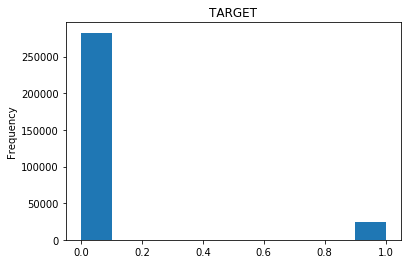

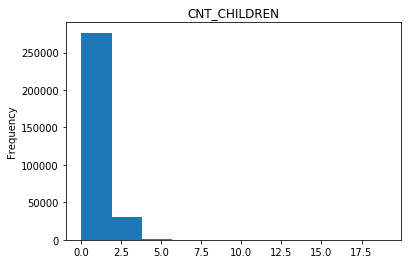

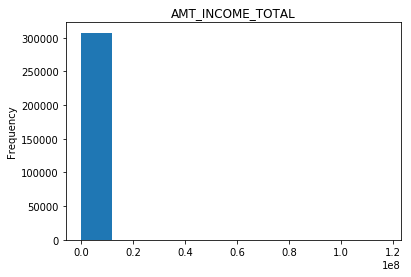

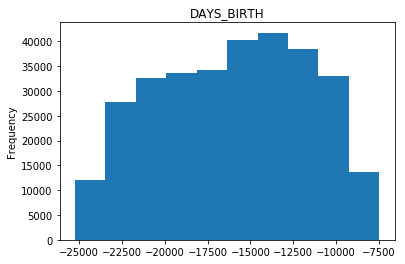

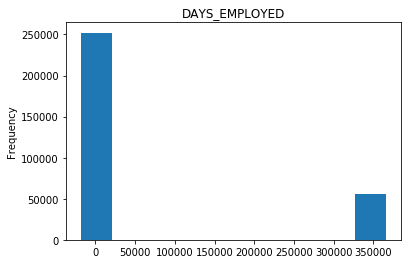

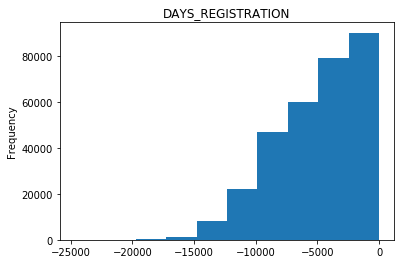

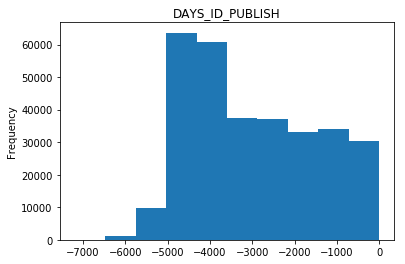

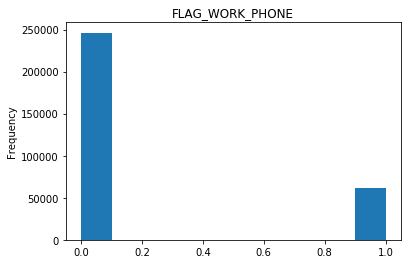

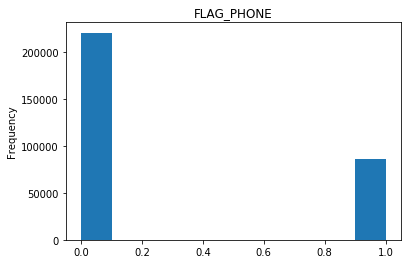

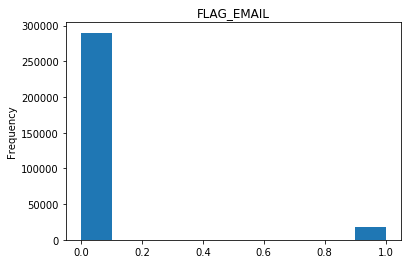

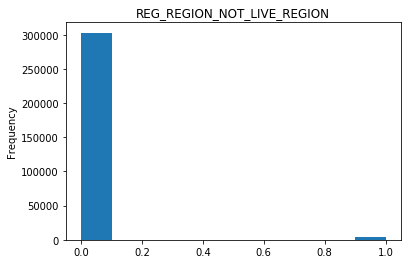

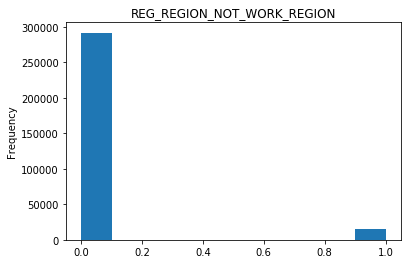

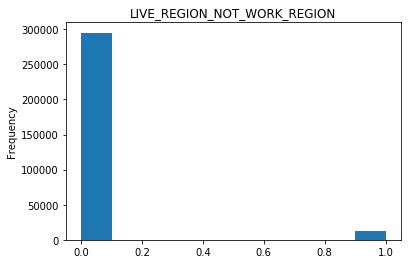

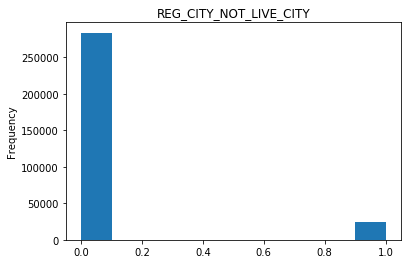

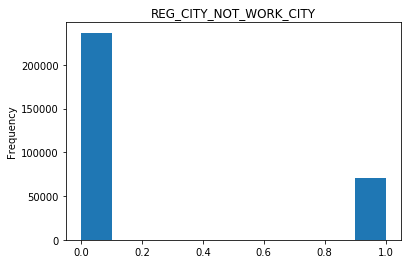

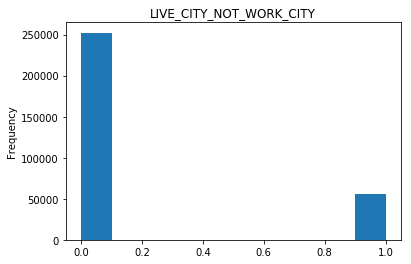

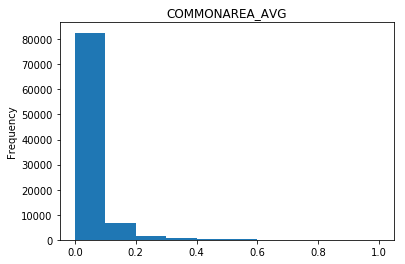

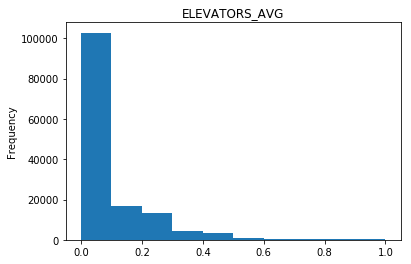

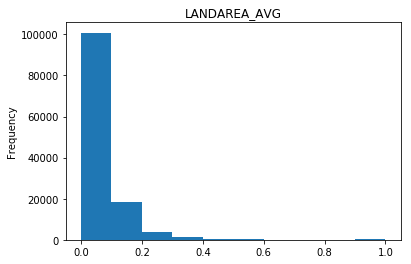

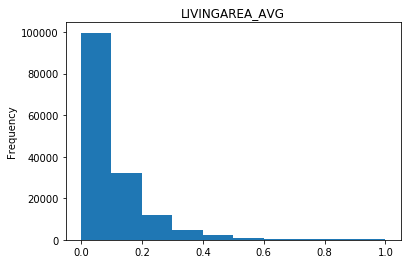

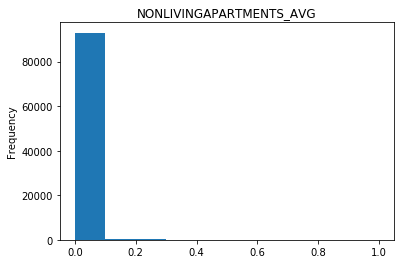

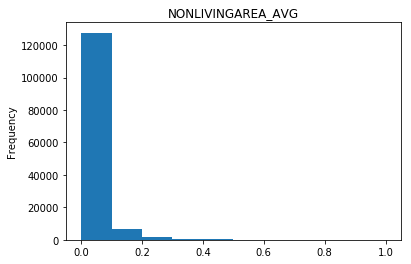

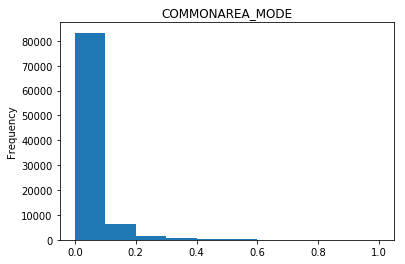

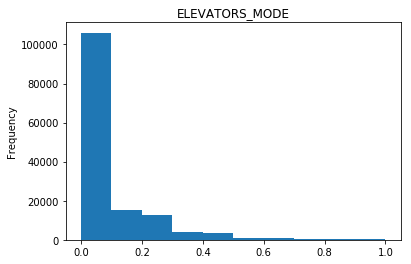

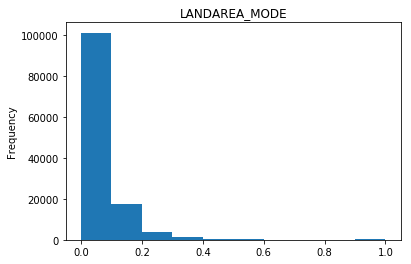

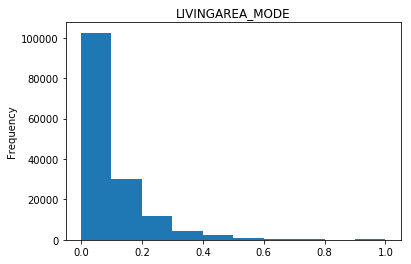

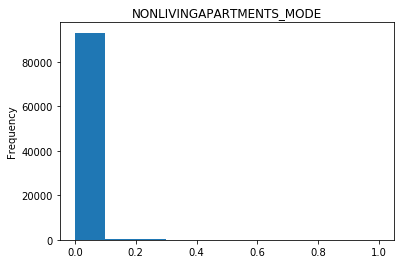

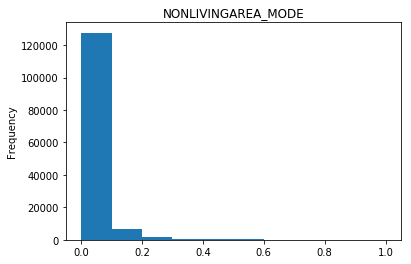

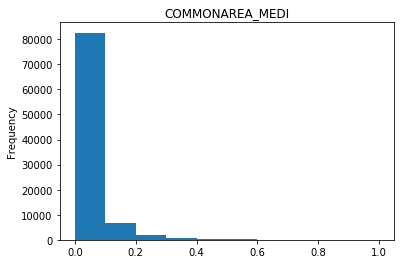

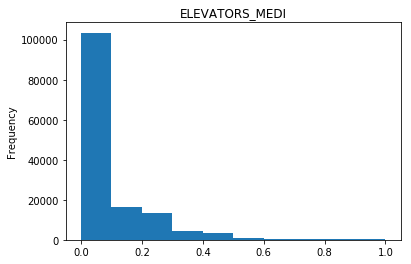

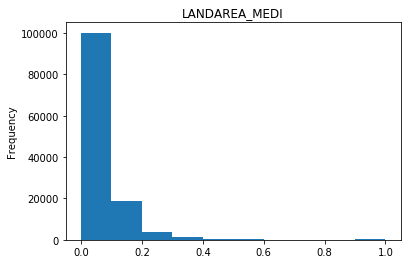

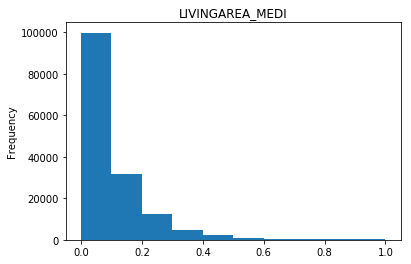

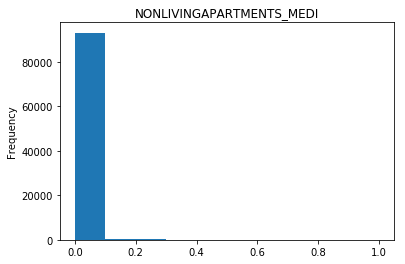

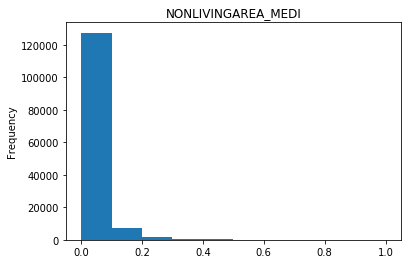

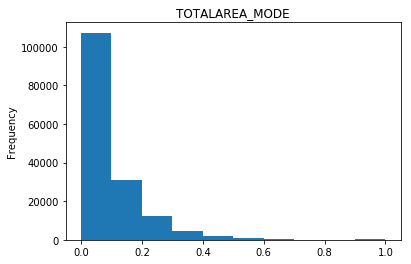

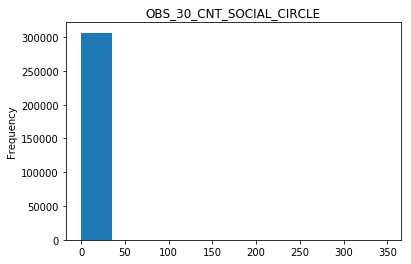

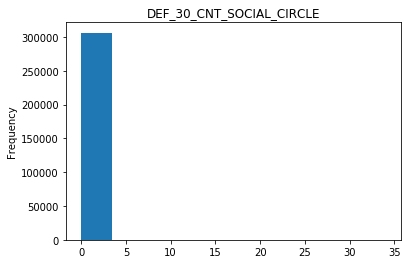

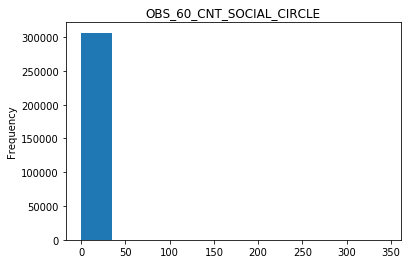

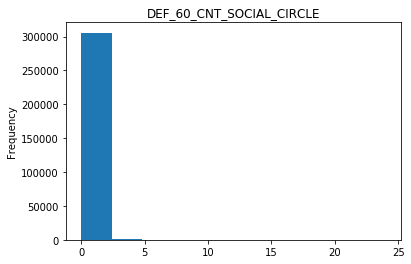

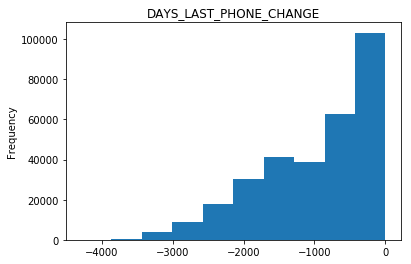

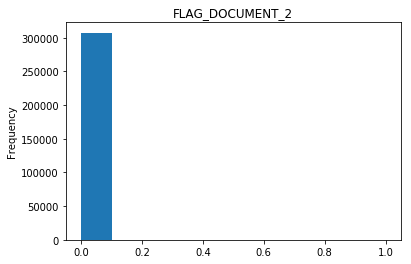

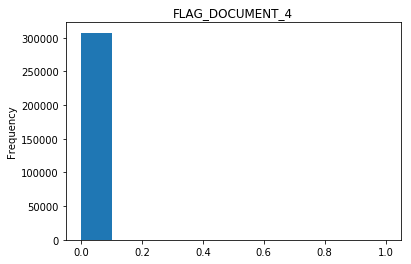

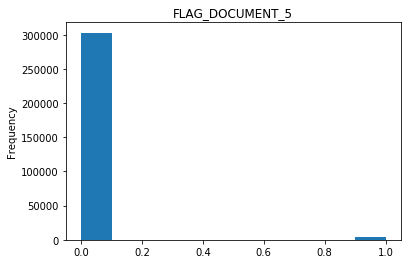

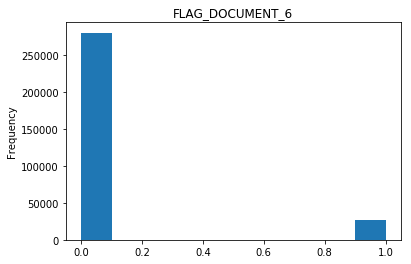

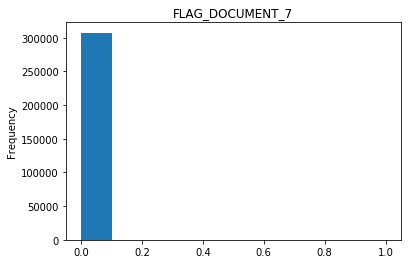

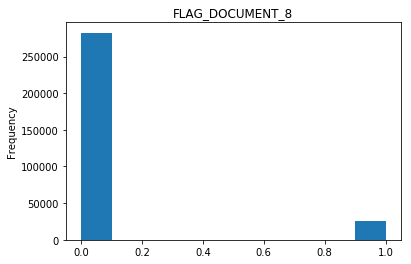

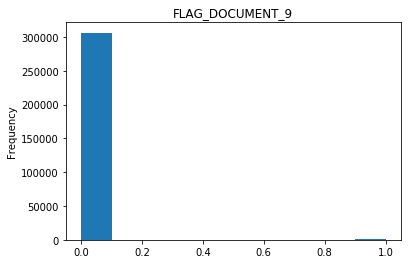

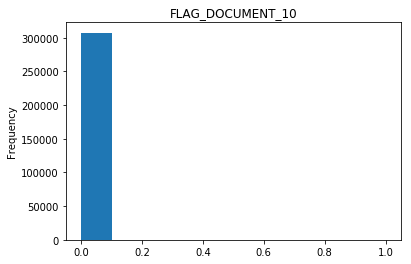

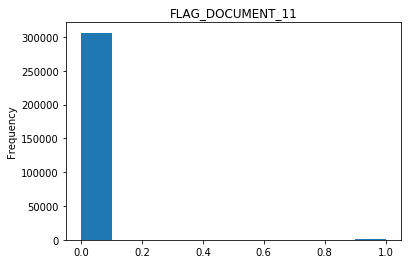

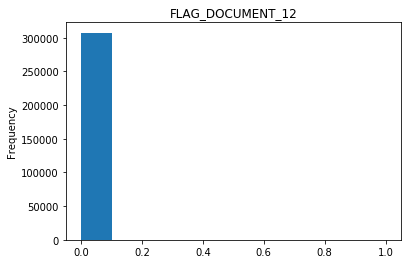

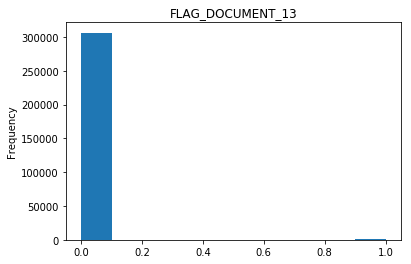

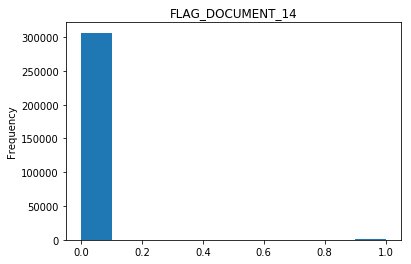

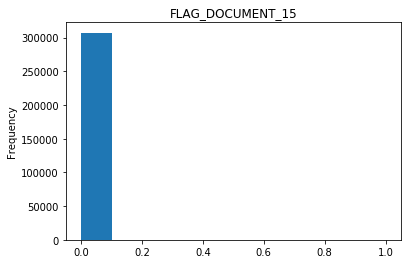

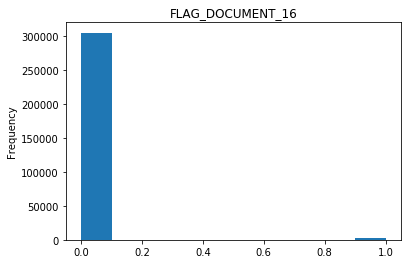

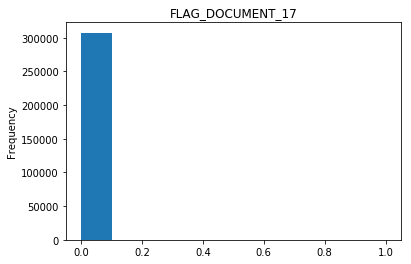

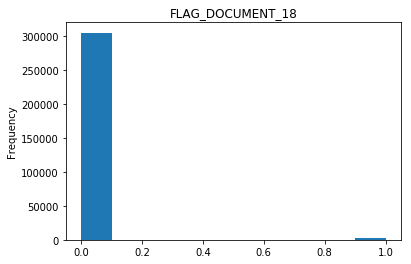

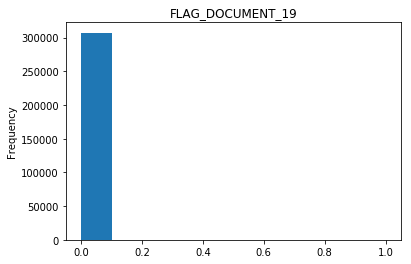

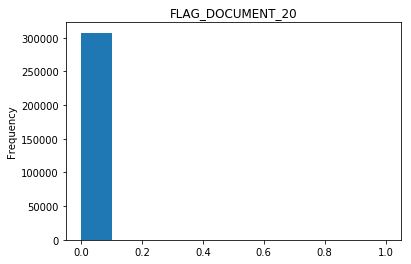

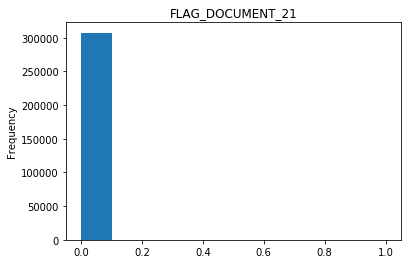

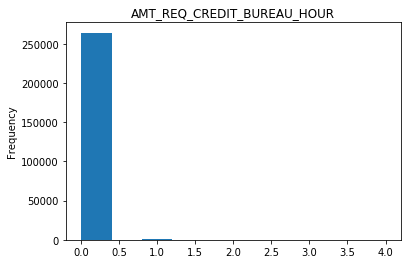

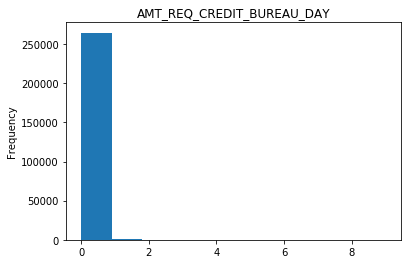

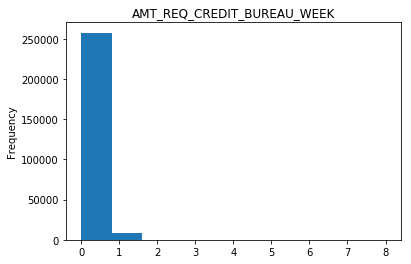

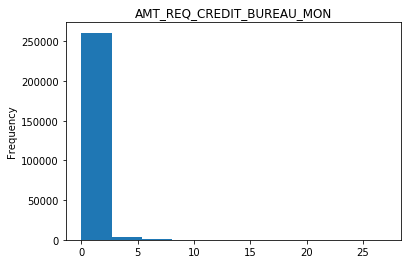

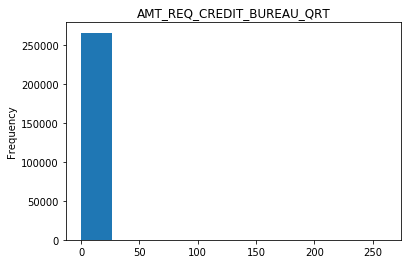

In [6]:
for c in sel.columns:
    app_train[c].plot.hist(title=c)
    plt.show()

In [7]:
app_train['OBS_30_CNT_SOCIAL_CIRCLE'].value_counts()

0.0      163910
1.0       48783
2.0       29808
3.0       20322
4.0       14143
5.0        9553
6.0        6453
7.0        4390
8.0        2967
9.0        2003
10.0       1376
11.0        852
12.0        652
13.0        411
14.0        258
15.0        166
16.0        133
17.0         88
18.0         46
19.0         44
20.0         30
21.0         29
22.0         22
23.0         15
24.0         11
25.0         11
27.0          5
26.0          3
30.0          2
28.0          1
348.0         1
29.0          1
47.0          1
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: int64

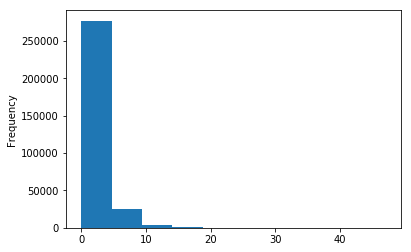

In [8]:
obs30=app_train['OBS_30_CNT_SOCIAL_CIRCLE'].copy()
obs30=obs30[obs30!=348.0]
obs30.plot.hist()

## 請參考 HomeCredit_columns_description.csv 的欄位說明，觀察並列出三個你覺得可能有 outlier 的欄位並解釋可能的原因

## 觀察方式: 
 1. 若由 hist() 觀察例外值，僅能對數值資料判斷
 2. 先 discribe() 找 std>>mean 者, 作直方圖直接觀察
 3. 發現如果答案是 [0,1] (one-hot-encoding)，通常 std>mean, 之後應該將這類資料移除
 4. 非 one-hot-encoding 者, 觀察到 
    * OBS_[30|60]_CNT_SOCIAL_CIRCLE, DEF_[30|60]_CNT_SOCIAL_CIRCLE, 其直方圖範圍很大?
    * FLAG_DOCUMENT_X 值方圖範圍也很大, 但僅是指是否攜帶某些文件, 應該是依照需求, 並非異常現象
    * LANDAREA_XXX 之類值方圖範圍也很大, 可能有異常
 5. 對 OBS_30_CNT_SOCIAL_CIRCLE 以 value_counts() 查看內容，客戶社會環境30天違約紀錄，0起的有163910客戶, 1起的有48783客戶, 2起的有29808客戶, 之後逐漸下跌, 到了24起~47起, 都只有一客戶. 但之後, 卻仍有一客戶有 347 大數量違約. 這應是異常. 檢視 SOCIAL_CIRCLE 這類數據內容，看是否異常
## 結論:
  1. OBS_[30|60]_CNT_SOCIAL_CIRCLE, DEF_[30|60]_CNT_SOCIAL_CIRCLE, LANDAREA_XXX 類，應有異常分布
  2. 但參考以下, DataFrame.boxplot() 是 box-and-whisker plot，更能視覺化異常值
     * [min,Q1,Q2,Q3,max]=[最小,第一四分位數,中位數,第三四分位數,最大值], Q3-Q1=IQR
     * 下限: Q1-1.5IQR
     * 上限: Q3+1.5IQR
     * 超過上下限是例外值，用“〇”標出溫和的異常值，用“＊”標出極端的異常值


In [9]:
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [10]:
# 先篩選數值型的欄位
"""
YOUR CODE HERE, fill correct data types (for example str, float, int, ...)
"""
d_sel = [np.float64, np.int64]
n_cols=list(app_train.columns[list(app_train.dtypes.isin(d_sel))])
n_df = app_train[n_cols]

# 再把只有 2 值 (通常是 0,1) 的欄位去掉
n_cols = list(n_df.columns[ list(n_df.apply(lambda x:len(x.unique())!=2 )) ] )
print("Numbers of remain columns %d" % len(n_cols))

# 其實也可將只有 3 值的欄位去掉
n_df = app_train[n_cols]
numeric_columns = list(n_df.columns[ list(n_df.apply(lambda x:len(x.unique())!=3 )) ] )
print("Numbers of remain columns %d" % len(numeric_columns))

# 檢視這些欄位的數值範圍
for col in numeric_columns:
    """
    Your CODE HERE, make the box plot
    """
    fig, (ax1, ax2) = plt.subplots(ncols=2)
    app_train.boxplot(column=[col], ax=ax1)
    app_train.hist(column=[col], ax=ax2)
    plt.show()

Numbers of remain columns 0
Numbers of remain columns 0


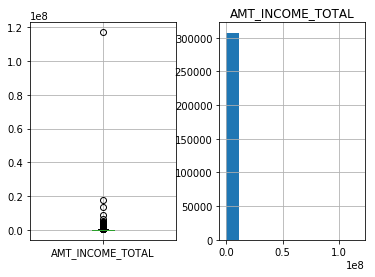

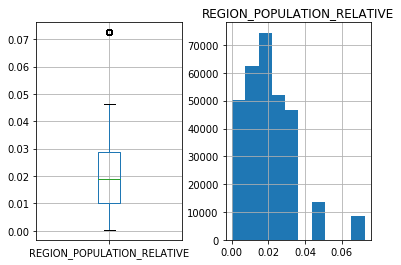

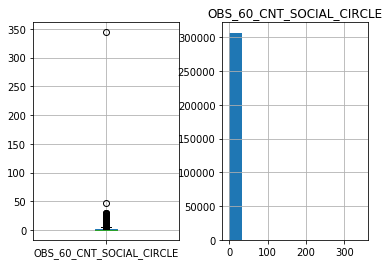

In [11]:
# 從上面的圖檢查的結果，至少這三個欄位好像有點可疑
# AMT_INCOME_TOTAL
# REGION_POPULATION_RELATIVE
# OBS_60_CNT_SOCIAL_CIRCLE
cols = ['AMT_INCOME_TOTAL', 'REGION_POPULATION_RELATIVE', 'OBS_60_CNT_SOCIAL_CIRCLE']
for c in cols:
    fig, (ax1,ax2) = plt.subplots(ncols=2)
    app_train.boxplot(column=c, ax=ax1)
    app_train.hist(column=c, ax=ax2)
    plt.show()

### Hints: Emprical Cumulative Density Plot, [ECDF](https://zh.wikipedia.org/wiki/%E7%BB%8F%E9%AA%8C%E5%88%86%E5%B8%83%E5%87%BD%E6%95%B0), [ECDF with Python](https://stackoverflow.com/questions/14006520/ecdf-in-python-without-step-function)

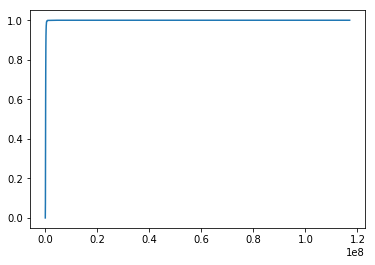

In [35]:
import statsmodels.api as sm
ait = app_train['AMT_INCOME_TOTAL']
ait_ = ait.values
ecdf = sm.distributions.ECDF(ait_)
plt.plot(ecdf.x, ecdf.y)
plt.show()

In [36]:
ecdf.x

array([            -inf,   2.56500000e+04,   2.56500000e+04, ...,
         1.35000000e+07,   1.80000900e+07,   1.17000000e+08])

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64


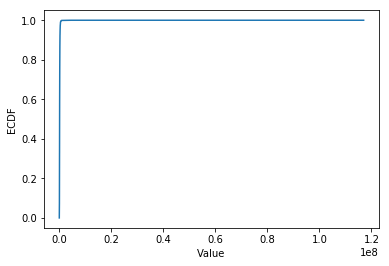

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in log


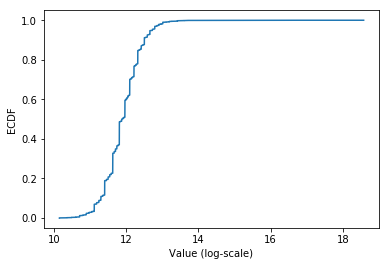

In [40]:
# 最大值離平均與中位數很遠
print(app_train['AMT_INCOME_TOTAL'].describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)
"""
YOUR CODE HERE
"""
#cdf = 
#plt.plot(list(cdf.index), cdf/cdf.max())
ait = app_train['AMT_INCOME_TOTAL']
ait_ = ait.values
ecdf0 = sm.distributions.ECDF(ait_)
plt.plot(ecdf0.x, ecdf0.y)
plt.xlabel('Value')
plt.ylabel('ECDF')
#plt.xlim([cdf.index.min(), cdf.index.max() * 1.05]) # 限制顯示圖片的範圍
#plt.xlim([ecdf0.x[1], ecdf0.x[-1] * 1.05]) # 限制顯示圖片的範圍
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍

plt.show()

# 改變 y 軸的 Scale, 讓我們可以正常檢視 ECDF
#plt.plot(np.log(list(cdf.index)), cdf/cdf.max())
plt.plot(np.log(ecdf0.x), ecdf0.y)
plt.xlabel('Value (log-scale)')
plt.ylabel('ECDF')

plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍

plt.show()

## 補充：Normal dist 的 ECDF
![ecdf_normal](https://au.mathworks.com/help/examples/stats/win64/PlotEmpiricalCdfAndCompareWithSamplingDistributionExample_01.png)

count    307511.000000
mean          0.020868
std           0.013831
min           0.000290
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64


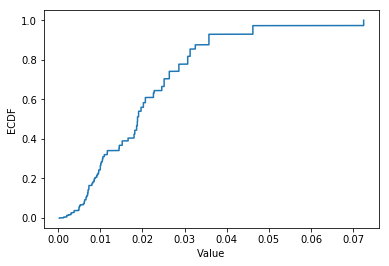

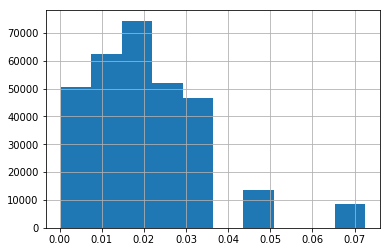

0.035792    16408
0.046220    13442
0.030755    12163
0.025164    11950
0.026392    11601
0.031329    11321
0.028663    11157
0.019101     8694
0.072508     8412
0.020713     8066
0.018850     7668
0.020246     7178
0.018634     7038
0.022625     6943
0.015221     6824
0.032561     6636
0.024610     6404
0.019689     6172
0.018029     6167
0.018801     6108
0.018209     6052
0.014520     4785
0.016612     4408
0.007020     4105
0.022800     3807
0.010032     3570
0.010006     3563
0.014464     3422
0.004960     3300
0.011703     3252
            ...  
0.006008     1796
0.003069     1783
0.008575     1763
0.008474     1740
0.007274     1724
0.007114     1684
0.006305     1672
0.008068     1668
0.008866     1654
0.006671     1653
0.002042     1642
0.003813     1616
0.005084     1482
0.006296     1225
0.005313     1218
0.003818     1212
0.003122     1147
0.006233     1087
0.005002     1068
0.002134     1051
0.004849     1038
0.005144      967
0.002506      944
0.003541      627
0.001276  

In [41]:
# 最大值落在分布之外
rpr = app_train['REGION_POPULATION_RELATIVE']
print(rpr.describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)
"""
Your Code Here
"""

#cdf1 = 
#plt.plot(list(cdf1.index), cdf1/cdf1.max())
rpr_ = rpr.values
ecdf1 = sm.distributions.ECDF(rpr_)
plt.plot(ecdf1.x, ecdf1.y)

plt.xlabel('Value')
plt.ylabel('ECDF')
#plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍
plt.show()

rpr.hist()
plt.show()

rpr.value_counts()

# 就以這個欄位來說，雖然有資料掉在分布以外，也不算異常，僅代表這間公司在稍微熱鬧的地區有的據點較少，
# 導致 region population relative 在少的部分較為密集，但在大的部分較為疏漏

count    306490.000000
mean          1.405292
std           2.379803
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64


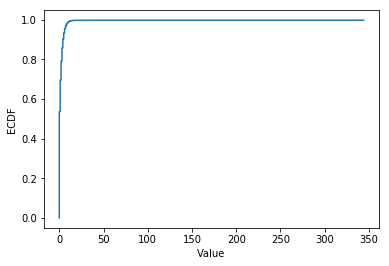

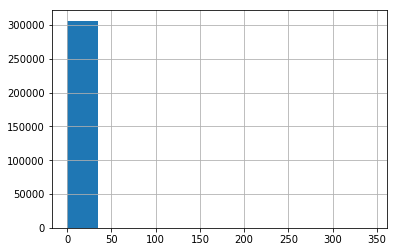

344.0         1
47.0          1
30.0          1
29.0          2
28.0          1
27.0          5
26.0          1
25.0         11
24.0         12
23.0         13
22.0         20
21.0         28
20.0         30
19.0         44
18.0         49
17.0         73
16.0        137
15.0        166
14.0        238
13.0        401
12.0        620
11.0        837
10.0       1335
9.0        1959
8.0        2886
7.0        4344
6.0        6349
5.0        9463
4.0       13946
3.0       20215
2.0       29766
1.0       48870
0.0      164666
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: int64


In [42]:
# 最大值落在分布之外
o6csc = app_train['OBS_60_CNT_SOCIAL_CIRCLE']
print(o6csc.describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)
"""
Your Code Here
"""
#cdf = 
#plt.plot(list(cdf.index), cdf/cdf.max())
o6csc_ = o6csc.values
ecdf2 = sm.distributions.ECDF(o6csc_)
plt.plot(ecdf2.x, ecdf2.y)
plt.xlabel('Value')
plt.ylabel('ECDF')
#plt.xlim([cdf.index.min() * 0.95, cdf.index.max() * 1.05])
#plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍
plt.show()

o6csc.hist()
plt.show()
print(o6csc.value_counts().sort_index(ascending = False))

## 注意：當 histogram 畫出上面這種圖 (只出現一條，但是 x 軸延伸很長導致右邊有一大片空白時，代表右邊有值但是數量稀少。這時可以考慮用 value_counts 去找到這些數值

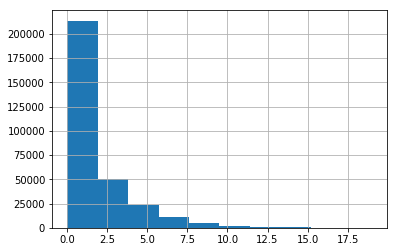

In [46]:
# 把一些極端值暫時去掉，在繪製一次 Histogram
# 選擇 OBS_60_CNT_SOCIAL_CIRCLE 小於 20 的資料點繪製
"""
Your Code Here
"""
loc_a = app_train['OBS_60_CNT_SOCIAL_CIRCLE']<20
loc_b = 'OBS_60_CNT_SOCIAL_CIRCLE'

app_train.loc[loc_a, loc_b].hist()
plt.show()